In [37]:
from qutip import *
import numpy as np
import random
import matplotlib.pyplot as plt
from ipywidgets import interact
import matplotlib.transforms as transforms
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib


alpha = 3                              # Alpha
N = 50                                 # Size of the Hilbert space
steps = 100                            # Amount of time steps in the Linblad equation
end_time = np.pi                       # Screen position
t = np.linspace(0.0, end_time, steps)  # Time steps

a = destroy(N)                         # Annihilation operator
x = a + a.dag()                        # Position operator
H = (a.dag()*a + 0.5)                  # Hamiltonian

cat = (coherent(N, alpha*1j) + coherent(N, alpha*-1j)).unit()

In [38]:
def update(i):
    # Initial state
    cat_alpha = (coherent(N, i*1j) + coherent(N, i*-1j)).unit()
    
    # Propagate state to get state at screen
    result = mesolve(H, cat_alpha, t, qeye(N))
    rho = result.states[len(result.states) - 1]

    plot_wigner(rho)

interact(update, i=(0, 5));

interactive(children=(IntSlider(value=2, description='i', max=5), Output()), _dom_classes=('widget-interact',)…

In [39]:
# Simulate a number of random collapses at the screen
collapses = 10000  # Amount of collapses
big_N = 1000       # Size of the larger Hilbert space
zoom = 4           # x-axis bounds

# def collapse(rho, x, no_collapses, zoom):
# Collapse function
# To simulate random collapses of the wavefunction using certain operators, we created the collapse function. This function 
# transforms the state  |ψ⟩  to the basis of eigenstates of the operator we measure with;  |ϕ1⟩,|ϕ2⟩,...|ϕN⟩ :
# |ψ⟩=∑iNci|ϕi⟩
 
# where the coefficients  ci=⟨ϕi|ψ⟩ . This transformation will give the vector with those coefficients, which can then be used to create a probability distribution. The probability of collapsing  |ψ⟩  to  |ϕi⟩  and thus measuring eigenvalue  λi  is  |ci|2 . However, the LME solver returns a density matrix instead of a state vector. To transform the density matrix to the basis of eigenstates and extract the needed  |ci|2 's we use the following formula:
# |ci|2=Tr(|ϕ⟩i|ϕ⟩†iρ)
 
# where  Tr()  is the trace operation and  ρ  is the density matrix.
    
result_me = mesolve(H, cat, t, qeye(N))
rho = result_me.states[len(result_me.states) - 1]   # The last state is the state at the screen

# To improve the resolution of the plot we enlarge the hilbert space
# extrapolated_rho, extrapolated_x = extrapolate_hilbert_space(rho, big_N)

# Transform to the basis of eigenstates of the x operator and collapse
eigvals, eigstates = x.eigenstates()
array = collapse(rho, x, collapses, zoom=zoom)

# Plot  the result
plt.figure(figsize=(6,3))
plt.xlim(-zoom, zoom)
plt.hist(array, bins=eigvals)
plt.ylabel(r"Counts")
plt.xlabel('eigenvalues operator')
plt.show()

NameError: name 'collapse' is not defined

In [40]:
nb = True
%matplotlib inline

In [41]:

# Set number of frames and frames per second
Nfrm = 480
fps = 60

# Coordinates for wave sources
source1 = [-12, 12]
source2 = [12, 12]
##ADD MORE SLITS

In [42]:
def sine(X, Y, phi, source=source1):
    # Function is e^(-sqrt(X^2 + Y^2)) * sin(sqrt(X^2 + Y^2))
    # (with some coefficients here and there to make it look pretty)
    return .75 * np.exp(-1 * np.sqrt((X + source[0])**2 + (Y + source[1])**2) / 30) * np.sin((np.sqrt((X + source[0])**2 + (Y + source[1])**2) / 3) - phi)
    

def generate(X, Y, phi):
    # Generates source waves R1 and R2 with their respective offsets
    R1 = sine(X, Y, phi, source1)
    R2 = sine(X, Y, phi, source2)
    # Combine them into a single wave and reduce the scale of the waves
    R = R1 + R2
    return R

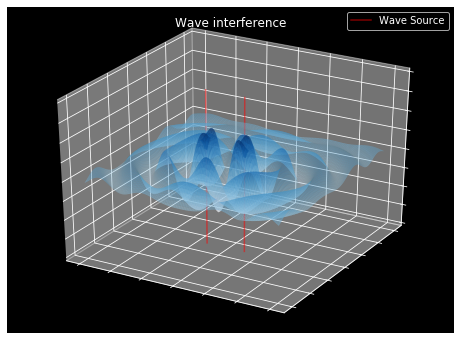

In [43]:

# Create the plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot styling
plt.title("Wave interference")
plt.style.use('dark_background')

# Make the X, Y meshgrid.
xs = np.linspace(-60, 60, 125)
ys = np.linspace(-60, 60, 125)
X, Y = np.meshgrid(xs, ys)

# Set the z axis limits so they aren't recalculated each frame.
ax.set_zlim(-2, 2)

# Draw wave sources as vertical line segments
source1z = np.array([-2, 2])
source1x = np.array([-source1[0], -source1[0]])
source1y = np.array([-source1[1], -source1[1]])
ax.plot3D(source1x, source1y, source1z, 'red', alpha=.5)
source2z = np.array([-2, 2])
source2x = np.array([-source2[0], -source2[0]])
source2y = np.array([-source2[1], -source2[1]])
ax.plot3D(source2x, source2y, source2z, 'red', alpha=.5, label="Wave Source")
ax.legend()

##ADD MORE SLITS

# Remove ticklabels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])



# Begin plotting.
surface = None
Z = generate(X, Y, 0)

def update(idx):
    phi=phis[idx]
    
    global surface
    # If a line collection is already remove it before drawing.
    if surface:
        # ax.collections.remove(wframe)
        ax.collections.remove(surface)

    # Plot the new surface and pause briefly before continuing.
    Z = generate(X, Y, phi * .2)
    surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='Blues', alpha=.5, edgecolor='none')
    
  
    
    
phis = np.linspace(0, 180. / np.pi, Nfrm)
ani = animation.FuncAnimation(fig, update, Nfrm, interval=2000/fps)